In [1]:
import json
from flask import Flask, request
import pandas as pd
from dotenv import load_dotenv
import os
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from json_image import image_to_json
import matplotlib
matplotlib.use('agg')
from flask_cors import CORS, cross_origin
import re
import openai

In [2]:
load_dotenv()
API_KEY = os.environ['OPENAI_API_KEY']
from pandasai.llm import AzureOpenAI
llm = AzureOpenAI(
    deployment_name='sdgi-gpt-35-turbo-16k',
    # model_name='gpt-35-turbo-16k',
    api_token=os.getenv('OPENAI_API_KEY'),
    api_base=os.getenv('OPENAI_API_BASE'),
    api_version=os.getenv('OPENAI_API_VERSION'),
    # is_chat_model=True,
)

In [2]:
# standard library
import os

# data wrangling
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm import AzureOpenAI

# utils
from dotenv import load_dotenv
load_dotenv()

llm = AzureOpenAI(
    deployment_name='sdgi-gpt-35-turbo-16k',
    # model_name='gpt-35-turbo-16k',
    api_token=os.getenv('OPENAI_API_KEY'),
    api_base=os.getenv('OPENAI_API_BASE'),
    api_version=os.getenv('OPENAI_API_VERSION'),
    # is_chat_model=True,
)


In [3]:
sheets = pd.read_excel('Moonshot Tracker Results.xlsx', sheet_name=None)

In [4]:
from pandasai import SmartDataframe
df = SmartDataframe(sheets['Projects'], config={"llm": llm, 'enable_cache': False})

In [5]:
sheets['Projects']

,Project ID,Project Title,Budget,Country,Country Code,Link,Output Count,Description,SDGs,Solution,Donors,Direct Beneficiaries,Indirect Beneficiaries,Old Beneficiaries
0,117913,Résilience des communautés et des écosystèmes,3459600.0,Togo,TGO,http://open.undp.org/projects/00117913,4,Il s’agit de la promotion du développement Loc...,[13],"['Others', 'Close the energy gap']",['UNITED NATIONS DEVELOPMENT PRO'],0,0.0,0.0
1,134793,Accès aux énergies renouvelables en milieu rur...,1431552.0,Togo,TGO,http://open.undp.org/projects/00134793,6,Accélération de l’accès aux énergies renouvela...,[7],['Close the energy gap'],['UNITED NATIONS DEVELOPMENT PRO'],0,0.0,6090.0
2,91204,Apoyo A La Modernización De La Gestión Ambiental,2158828.0,Panama,PAN,https://open.undp.org/projects/00082182,3,NaN,NaN,NaN,NaN,0,0.0,NaN
3,136701,Strategic Contribution to GRZ,8805909.0,Zambia,ZMB,http://open.undp.org/projects/00136701,1,This umbrella Project Initiation Plan (PIP) wi...,"[1, 13, 16, 5, 7, 9]","['Others', 'Keeping people out of poverty', 'S...","['EUROPEAN COMMISSION', 'FOOD AND AGRICULTURE ...",0,0.0,0.0
4,6613,Africa Mini-grids Program,1363947.0,Zambia,ZMB,PIMS+,8,NaN,NaN,NaN,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,6249,Green Sharm El Sheikh,6212694.0,Egypt,EGY,PIMS+,1,NaN,NaN,NaN,GEF,0,0.0,NaN
294,4998,Grid-connected Small-Scale Photovoltaic Syste,3536364.0,Egypt,EGY,PIMS+,1,NaN,NaN,NaN,GEF,0,0.0,NaN
295,130275,Promote small-scale PV-UNDP-EGY,1103288.0,Egypt,EGY,Quantum,1,NaN,NaN,NaN,Japan,0,0.0,NaN
296,130610,Multilateral Support to COP27,1500000.0,Egypt,EGY,Qunatum,1,NaN,NaN,NaN,EU,0,0.0,NaN


In [6]:
out = df.chat(
    '    list all the project with budget over 100000000  ',
)
out

'Unfortunately, I was not able to answer your question, because of the following error:\n\nUnrecognized request argument supplied: seed\n'

In [7]:
out = df.chat(
    'list all the project titles with budget over 1000000. ',
)
out

'Unfortunately, I was not able to answer your question, because of the following error:\n\nUnrecognized request argument supplied: seed\n'

In [11]:
df.chat(
    "Plot the distribution of the Budgets",
)

/Users/gaomingrui/opt/anaconda3/envs/UNDP/lib/python3.11/site-packages/pandasai/smart_datalake/__init__.py:413: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show(block=self._is_running_in_console())


In [6]:
df.chat(
    "Plot the distribution of the Budgets over 10000000",
)

/Users/gaomingrui/opt/anaconda3/envs/UNDP/lib/python3.11/site-packages/pandasai/smart_datalake/__init__.py:413: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show(block=self._is_running_in_console())


In [9]:
df.chat(
    "Give me the highest top 5 budget and their title",
)

,Budget,Project Title
297,3.220000e+08,Projet d’Electrification Rurale en Zones Isol...
262,8.632392e+07,Provision & Installation of Solar Powered Stre...
87,6.775257e+07,EU4Schools Phase II (Albania)
23,5.616507e+07,Tiendas Comunitarias - La Guajira
213,4.584189e+07,Electricity and Energy Support


In [19]:
out = df.chat(
    'list all the project with budget over 1000000. ',
)
out

,Project ID,Project Title,Budget
0,117913,Résilience des communautés et des écosystèmes,3459600.0
1,134793,Accès aux énergies renouvelables en milieu rur...,1431552.0
2,91204,Apoyo A La Modernización De La Gestión Ambiental,2158828.0
3,136701,Strategic Contribution to GRZ,8805909.0
4,6613,Africa Mini-grids Program,1363947.0
...,...,...,...
293,6249,Green Sharm El Sheikh,6212694.0
294,4998,Grid-connected Small-Scale Photovoltaic Syste,3536364.0
295,130275,Promote small-scale PV-UNDP-EGY,1103288.0
296,130610,Multilateral Support to COP27,1500000.0


In [53]:
out = df.chat(
    'list all the ids with budget over 1000000. ',
)
out

[117913,
 134793,
 91204,
 136701,
 6613,
 126170,
 5728,
 5256,
 120029,
 6468,
 143571,
 6403,
 6163,
 106770,
 135714,
 137462,
 132166,
 101702,
 6469,
 5484,
 6479,
 1000378,
 133573,
 4685,
 5543,
 10414,
 122410,
 127688,
 129076,
 122455,
 5574,
 5299,
 5831,
 116770,
 93964,
 127444,
 79213,
 107296,
 100396,
 132364,
 129975,
 123355,
 132730,
 132179,
 133752,
 117181,
 6411,
 5284,
 6542,
 124739,
 139866,
 111467,
 119366,
 145829,
 106888,
 5680,
 125245,
 123351,
 120786,
 123296,
 115727,
 125900,
 99918,
 4114,
 4690,
 113647,
 107168,
 107166,
 92045,
 119001,
 6618,
 6431,
 5395,
 130247,
 94293,
 130474,
 48025,
 105415,
 107560,
 132013,
 132014,
 5882,
 5646,
 5188,
 127230,
 5462,
 6657,
 4602,
 1061012,
 134019,
 117633,
 98606,
 128990,
 76640,
 6692,
 5452,
 6089,
 6451,
 96620,
 125243,
 5673,
 5323,
 5285,
 124212,
 115827,
 5926,
 5613,
 6188,
 6159,
 5997,
 6417,
 5392,
 128213,
 124574,
 5702,
 126434,
 142434,
 6333,
 5721,
 4673,
 6486,
 5681,
 5509,
 5

In [55]:
json.dumps(out)

'[117913, 134793, 91204, 136701, 6613, 126170, 5728, 5256, 120029, 6468, 143571, 6403, 6163, 106770, 135714, 137462, 132166, 101702, 6469, 5484, 6479, 1000378, 133573, 4685, 5543, 10414, 122410, 127688, 129076, 122455, 5574, 5299, 5831, 116770, 93964, 127444, 79213, 107296, 100396, 132364, 129975, 123355, 132730, 132179, 133752, 117181, 6411, 5284, 6542, 124739, 139866, 111467, 119366, 145829, 106888, 5680, 125245, 123351, 120786, 123296, 115727, 125900, 99918, 4114, 4690, 113647, 107168, 107166, 92045, 119001, 6618, 6431, 5395, 130247, 94293, 130474, 48025, 105415, 107560, 132013, 132014, 5882, 5646, 5188, 127230, 5462, 6657, 4602, 1061012, 134019, 117633, 98606, 128990, 76640, 6692, 5452, 6089, 6451, 96620, 125243, 5673, 5323, 5285, 124212, 115827, 5926, 5613, 6188, 6159, 5997, 6417, 5392, 128213, 124574, 5702, 126434, 142434, 6333, 5721, 4673, 6486, 5681, 5509, 5143, 101711, 5749, 118154, 6619, 120120, 130635, 85669, 75195, 45670, 135028, 114485, 144124, 118895, 125400, 6321, 5674, 

In [50]:
import pandasai
isinstance(out, pandasai.smart_dataframe.SmartDataframe)

True

In [43]:
out.columns

Index(['Project ID', 'Project Title', 'Budget'], dtype='object')

In [44]:
pd.DataFrame(out, columns=out.columns)

,Project ID,Project Title,Budget
0,117913,Résilience des communautés et des écosystèmes,3459600.0
1,134793,Accès aux énergies renouvelables en milieu rur...,1431552.0
2,91204,Apoyo A La Modernización De La Gestión Ambiental,2158828.0
3,136701,Strategic Contribution to GRZ,8805909.0
4,6613,Africa Mini-grids Program,1363947.0
...,...,...,...
201,6249,Green Sharm El Sheikh,6212694.0
202,4998,Grid-connected Small-Scale Photovoltaic Syste,3536364.0
203,130275,Promote small-scale PV-UNDP-EGY,1103288.0
204,130610,Multilateral Support to COP27,1500000.0


In [46]:
pd.DataFrame(out, columns=out.columns)

,Project ID,Project Title,Budget
0,117913,Résilience des communautés et des écosystèmes,3459600.0
1,134793,Accès aux énergies renouvelables en milieu rur...,1431552.0
2,91204,Apoyo A La Modernización De La Gestión Ambiental,2158828.0
3,136701,Strategic Contribution to GRZ,8805909.0
4,6613,Africa Mini-grids Program,1363947.0
...,...,...,...
201,6249,Green Sharm El Sheikh,6212694.0
202,4998,Grid-connected Small-Scale Photovoltaic Syste,3536364.0
203,130275,Promote small-scale PV-UNDP-EGY,1103288.0
204,130610,Multilateral Support to COP27,1500000.0


In [11]:
out.to_json()

TypeError: DataframeAbstract.to_json() missing 1 required positional argument: 'path'

In [13]:
image_path = "exports/charts/temp_chart.png"
with open(image_path, 'rb') as file:
    image_data = file.read()

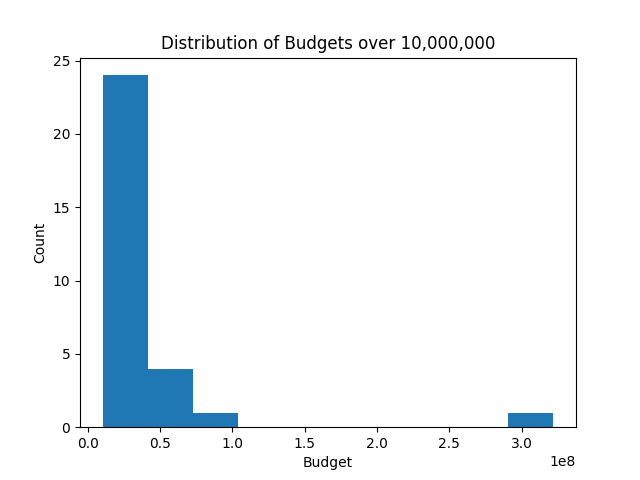

In [18]:
image_to_json(image_path)
json_to_image(image_to_json(image_path))

In [21]:
url = 'http://127.0.0.1:5000/'  

In [22]:
import requests
import json
test = {
    'table_name': 'Projects',
    'prompt':  "Give me the highest top 5 budget and their title"
}
response = requests.post(url, json=test )

In [1]:
import pandas as pd
import numpy as np
import json
import os
import faiss
from dotenv import load_dotenv
import openai
import spacy

# Load environment variables
load_dotenv()

# Set up OpenAI
openai.api_type = "azure"
openai.api_base = os.getenv('OPENAI_API_BASE')
openai.api_version = "2023-05-15"
openai.api_key = os.getenv('OPENAI_API_KEY')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load document embeddings DataFrame
df = pd.read_pickle('df_embed_EN.pkl')

def find_mentioned_countries(text):
    doc = nlp(text)
    countries = set()
    
    for ent in doc.ents:
        if ent.label_ == "GPE":  # GPE stands for "Geopolitical Entity"
            countries.add(ent.text)
    
    return list(countries)

def filter_country(user_query):
    country = find_mentioned_countries(user_query)[0]
    return df[df['Country Name'] == country]

def search_embeddings(user_query):
    df_filtered = filter_country(user_query)
    length = len(df_filtered.head())
    filtered_embeddings_arrays = np.array(list(df_filtered['Embedding']))
    index = faiss.IndexFlatIP(filtered_embeddings_arrays.shape[1]) 
    index.add(filtered_embeddings_arrays)
    
    user_query_embedding = openai.Embedding.create(
        input=user_query, engine="sdgi-embedding-ada-002"
    )["data"][0]["embedding"]
    
    k = min(5, length)
    distances, indices = index.search(np.array([user_query_embedding]), k)
    return df_filtered, distances, indices

def get_answer(user_question, content):
    system_prompt = "You are a system that answers user questions based on excerpts from PDF documents provided for context. Only answer if the answer can be found in the provided context. Do not make up the answer; if you cannot find the answer, say so."
    messages = [
        {'role': 'system', 'content': system_prompt},
        {'role': 'user', 'content': user_question},
        {'role': 'user', 'content': content},
    ]
    
    response = openai.ChatCompletion.create(
        engine="sdgi-gpt-35-turbo-16k",
        messages=messages,
        temperature=0.2,
        # max_tokens=2000
    )
    return response

def response_generating(user_query):
    df, distances, indices = search_embeddings(user_query)
    dis = distances[0][::-1]
    ind = indices[0][::-1]
    
    for i in range(len(dis)):
        content = df.iloc[ind[i]]['content_cut']
        print("Searching document {} ({})...".format(df.iloc[ind[i]]['Document Title'], df.iloc[ind[i]]['Link']))
        response = get_answer(user_query, content)
        answer = response['choices'][0]['message']['content']
        
        not_found_phrases = ['not mention', 'not mentioned', 'I did not find', 'not found', 'no information', 'not contain', 'cannot be found', 'no mention']
        
        if any(phrase.lower() in answer.lower() for phrase in not_found_phrases):
            print('Answer not found in this document')
            continue
        else:
            return answer

user_query = "Give me a summary of the goals UNDP wants to achieve in 10 years and the energy plans for Philippines"
response_generating(user_query)


Philippines
Searching document nan (https://policy.asiapacificenergy.org/sites/default/files/energy_efficiency_and_conservation_roadmap2014-2030.pdf)...
Answer not found in this document
Searching document nan (https://policy.asiapacificenergy.org/sites/default/files/Philippines%20Energy%20Efficiency%20and%20Conservation%20Roadmap%202017-2040.pdf)...
Answer not found in this document
Searching document nan (https://policy.asiapacificenergy.org/sites/default/files/2012-2030_pep.pdf)...
Answer not found in this document
Searching document nan (https://policy.asiapacificenergy.org/sites/default/files/Philippine%20Energy%20Plan%202018-2040.pdf)...
Answer not found in this document
Searching document nan (https://digitallibrary.un.org/record/1637110/files/DP_DCP_PHL_3-EN.pdf?ln=en)...


'The goals that UNDP wants to achieve in the Philippines in the period of 2019-2023 are as follows:\n\n1. Enhance government capacities to utilize resources and track progress against the Sustainable Development Goals (SDGs).\n2. Strengthen public financial management for the efficient and effective execution of budgets allocated for the delivery of basic services.\n3. Strengthen existing platforms for citizen engagement with national and local government.\n4. Develop and apply climate-sensitivity models and hazard maps to better understand and plan for the extent, scope, and distribution of medium and long-term risks.\n5. Strengthen partnerships and introduce economic models to reduce biodiversity degradation and promote conservation.\n6. Support the participation of former combatants in local governance, public administration, and political processes to secure lasting peace.\n7. Establish platforms for transitional justice and community security to respond to the deep sense of margin

In [10]:
import os

# data wrangling
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm import AzureOpenAI

# utils
from dotenv import load_dotenv
load_dotenv()

df = pd.DataFrame({'name': list('ABCDE'), 'value': range(5)})
llm = AzureOpenAI(
    deployment_name='sdgi-gpt-35-turbo-16k',
    # model_name='gpt-35-turbo-16k',
    api_token=os.getenv('OPENAI_API_KEY'),
    api_base=os.getenv('OPENAI_API_BASE'),
    api_version=os.getenv('OPENAI_API_VERSION'),
    # is_chat_model=True,
)
df = SmartDataframe(df, config={'llm': llm, 'enable_cache': False})
print(df.chat('What is the average value?'))  # outputs 2.0
print(df.chat('What is the total for A, C and E?'))  # outputs 6

Unfortunately, I was not able to answer your question, because of the following error:

Unrecognized request argument supplied: seed

Unfortunately, I was not able to answer your question, because of the following error:

Unrecognized request argument supplied: seed



In [13]:
from pandasai import SmartDataframe
from pandasai.llm import AzureOpenAI

llm = AzureOpenAI(
    api_token=os.getenv('OPENAI_API_KEY'),
    api_base=os.getenv('OPENAI_API_BASE'),
    api_version=os.getenv('OPENAI_API_VERSION'),
    deployment_name='sdgi-gpt-35-turbo-16k'
)
df = SmartDataframe({'name': list('ABCDE'), 'value': range(5)}, config={"llm": llm})
print(df.chat('What is the average value?')) 

Unfortunately, I was not able to answer your question, because of the following error:

Unrecognized request argument supplied: seed

